# ABSTRACT
In this assignment we have selected ICC Worldcup 2019 as our domain consisting of the following data sets
1. ICC_CWC_19_teams 
2. ICC_CWC_19_players
3. ICC_CWC_19_boards

ICC_CWC_19_Teams being a large data set was normalised into different data sets so as to have the database in 1NF,2NF,3NF.

## 1. ICC_CWC_19_Teams

In [31]:
import pandas as pd
ICC_CWC_19_Teams= pd.read_csv('ICC_CWC_19_Teams.csv')
ICC_CWC_19_Teams

,Player_name,Team_ID,Team_name,Coach_name,Board_name
0,Gulbadin Naib (c),1,Afghanistan,Phil Simmons,Afghanistan Cricket Board
1,Rashid Khan (vc),1,Afghanistan,Phil Simmons,Afghanistan Cricket Board
2,Aftab Alam,1,Afghanistan,Phil Simmons,Afghanistan Cricket Board
3,Asghar Afghan,1,Afghanistan,Phil Simmons,Afghanistan Cricket Board
4,Dawlat Zadran,1,Afghanistan,Phil Simmons,Afghanistan Cricket Board
...,...,...,...,...,...
147,Ashley Nurse,10,WestIndies,Floyd Reifer,Cricket West Indies
148,Nicholas Pooran (wk),10,WestIndies,Floyd Reifer,Cricket West Indies
149,Kemar Roach,10,WestIndies,Floyd Reifer,Cricket West Indies
150,Andre Russell,10,WestIndies,Floyd Reifer,Cricket West Indies


### Physical Schema  

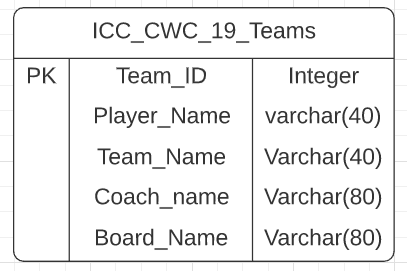

In [4]:
from IPython.display import Image
Image("Diagram 1.png", width = 300)

ICC_CWC_19_Teams being our main Databse and Team_ID being the primary key, we see alot of redundancy in the primary key which should not be the case so as to avoid editing discrepancies in the Database. To avoid such issues, we need to normalise the database into 1NF, 2NF and then eventually to 3NF.

## NORMALIZATION


### 1NF

First normal form (1NF) is a property of a relation in a relational database. A relation is in first normal form if and only if the domain of each attribute contains only atomic (indivisible) values, and the value of each attribute contains only a single value from that domain. Also,  primary keys should be uniquely identified.

To perform 1NF on out database, we seperated players information and created a differenct tables for players and its corresponding information as ICC_CWC_19_Players, independant of the ICC_CWC_19_Teams table.

In [5]:
ICC_CWC_19_Teams= pd.read_csv('ICC_CWC_19_Teams1.csv')
ICC_CWC_19_Teams

,Team_ID,Team_Name,Matches,Wins,Losses,Board_Name,Coach_Name
0,T1,India,10,7,2,Board of Control for Cricket in India,Ravi Shastri
1,T2,Australia,10,7,3,Cricket Australia,Justin Langer
2,T3,England,10,7,3,England and Wales Cricket Board,Trevor Bayliss
3,T4,New Zealand,10,6,3,New Zealand Cricket,Gary Stead
4,T5,Pakistan,8,5,3,Pakistan Cricket Board,Mickey Arthur
5,T6,Sri Lanka,8,3,4,Sri Lanka Cricket,Chandika Hathurusingha
6,T7,South Africa,9,3,5,Cricket South Africa,Ottis Gibson
7,T8,Bangladesh,9,3,5,Bangladesh Cricket Board,Steve Rhodes
8,T9,West Indies,9,2,6,Cricket West Indies,Floyd Reifer
9,T10,Afghanistan,9,0,9,Afghanistan Cricket Board,Phil Simmons


In [6]:
ICC_CWC_19_Players= pd.read_csv('ICC_CWC_19_Players.csv')
ICC_CWC_19_Players

,Player_Name,Player_Id,Team_Id
0,Gulbadin Naib (c),1,T10
1,Rashid Khan (vc),2,T10
2,Aftab Alam,3,T10
3,Asghar Afghan,4,T10
4,Dawlat Zadran,5,T10
...,...,...,...
147,Ashley Nurse,148,T9
148,Nicholas Pooran (wk),149,T9
149,Kemar Roach,150,T9
150,Andre Russell,151,T9


Team_ID being a primary key(PK) to ICC_CWC_19_Teams and being a foreign key(FK) to ICC_CWC_19_Players.
Player_ID being a primary key(PK) to ICC_CWC_19_Players. Hence for both the tabels, we see the primary keys are uniquely identifying the respective tables.

### Conceptual Model

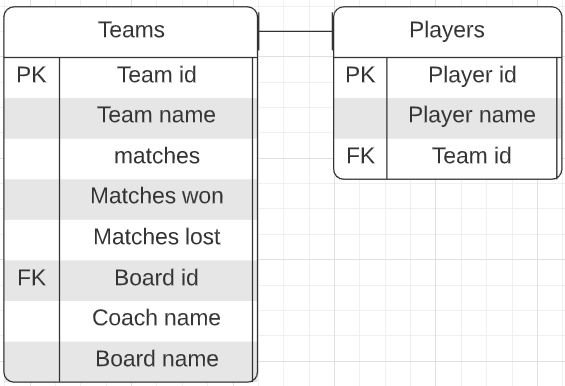

In [7]:
Image("Diagram 2.png", width = 400)

### Physical schema

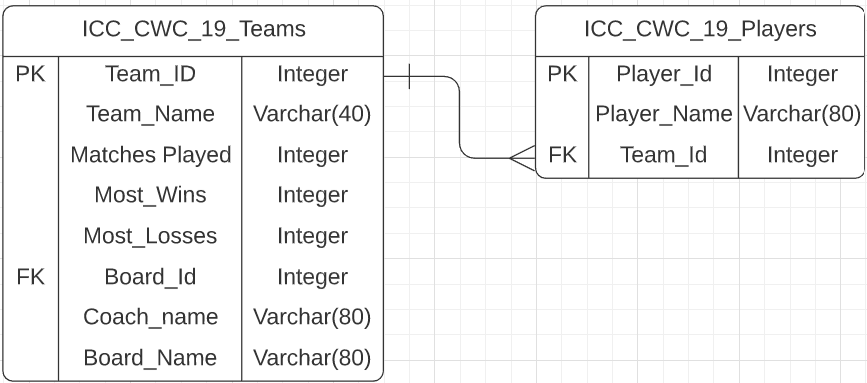

In [8]:
Image("Diagram 3.png", width = 500)

### 2NF


A relation is in the second normal form if it satisfies following two criterias:
1. All requirements for 1st NF must be met.
2. No partial dependencies.

As we see the tables above, they are already in 1NF and also we find no partial dependancies in any of the attributes. Hence we conclude that they are in 2nd Normal Form already.

### 3NF

A relation is called to be in a 3rd Normal Form if all the following criterias are satisfied:
1. All requirements for 2nd NF must be met.
2. Eliminate fields that do not directly depend on the primary key; that is no transitive dependencies.

In ICC_CWC_19_Teams, we have a transitive dependanciy in the table. We see that Coach_name is dependant on Board_name and Board_name is dependant on Team_ID, this creates a transitive dependancy. Hence to eliminate transitive dependancies, we created an independant tabel for baords i.e., ICC_CWC_19_Board.

Hence we have three different datasets connected in a database so as to make it normalised to the 3rd normal form.

In [9]:
ICC_CWC_19_Teams= pd.read_csv('ICC_CWC_19_Teams2.csv')
ICC_CWC_19_Teams

,Team_ID,Team_name,Matches,Wins,Losses,Board_Id
0,T1,India,10,7,2,B1
1,T2,Australia,10,7,3,B2
2,T3,England,10,7,3,B3
3,T4,New Zealand,10,6,3,B4
4,T5,Pakistan,8,5,3,B5
5,T6,Sri Lanka,8,3,4,B6
6,T7,South Africa,9,3,5,B7
7,T8,Bangladesh,9,3,5,B8
8,T9,West Indies,9,2,6,B9
9,T10,Afghanistan,9,0,9,B10


In [25]:
ICC_CWC_19_Teams.isnull().sum()

Team_ID      0
Team_name    0
Matches      0
Wins         0
Losses       0
Board_Id     0
dtype: int64

In [26]:
ICC_CWC_19_Teams.duplicated(['Team_ID'])

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [27]:
ICC_CWC_19_Players= pd.read_csv('ICC_CWC_19_Players.csv')
ICC_CWC_19_Players

,Player_Name,Player_Id,Team_Id
0,Gulbadin Naib (c),1,T10
1,Rashid Khan (vc),2,T10
2,Aftab Alam,3,T10
3,Asghar Afghan,4,T10
4,Dawlat Zadran,5,T10
...,...,...,...
147,Ashley Nurse,148,T9
148,Nicholas Pooran (wk),149,T9
149,Kemar Roach,150,T9
150,Andre Russell,151,T9


In [28]:
ICC_CWC_19_Players.isnull().sum()

Player_Name    0
Player_Id      0
Team_Id        0
dtype: int64

In [29]:
ICC_CWC_19_Players.duplicated(['Player_Id'])

0      False
1      False
2      False
3      False
4      False
       ...  
147    False
148    False
149    False
150    False
151    False
Length: 152, dtype: bool

In [30]:
ICC_CWC_19_Board= pd.read_csv('ICC_CWC_19_Boards.csv')
ICC_CWC_19_Board

,Board_Id,Board Name,Coach Name
0,B1,Board of Control for Cricket in India,Ravi Shastri
1,B2,Cricket Australia,Justin Langer
2,B3,England and Wales Cricket Board,Trevor Bayliss
3,B4,New Zealand Cricket,Gary Stead
4,B5,Pakistan Cricket Board,Mickey Arthur
5,B6,Sri Lanka Cricket,Chandika Hathurusingha
6,B7,Cricket South Africa,Ottis Gibson
7,B8,Bangladesh Cricket Board,Steve Rhodes
8,B9,Cricket West Indies,Floyd Reifer
9,B10,Afghanistan Cricket Board,Phil Simmons


In [21]:
ICC_CWC_19_Board.isnull().sum()

Board_Id      0
Board Name    0
Coach Name    0
dtype: int64

In [22]:
ICC_CWC_19_Board.duplicated(['Board_Id'])

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

### CONCEPTUAL MODEL

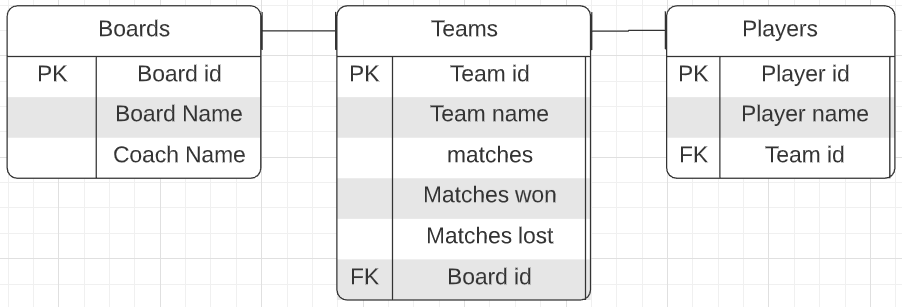

In [12]:
Image("Diagram 4.png", width = 500)

### PHYSICAL SCHEMA

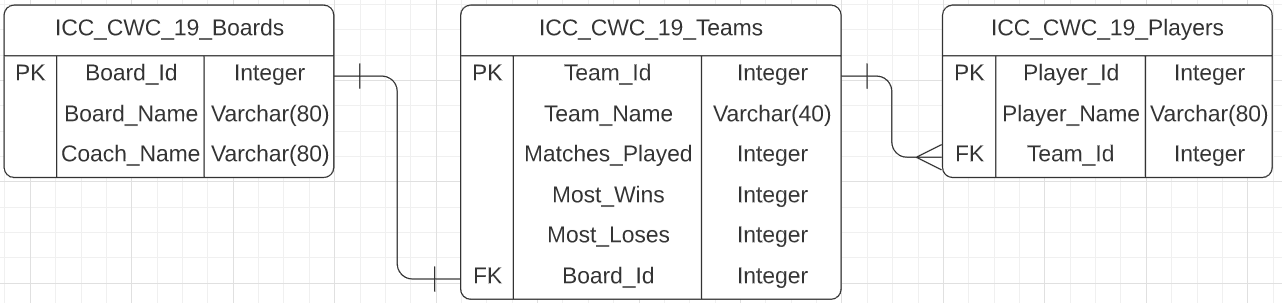

In [13]:
Image("Diagram 5.png", width = 700)

### UML Diagram

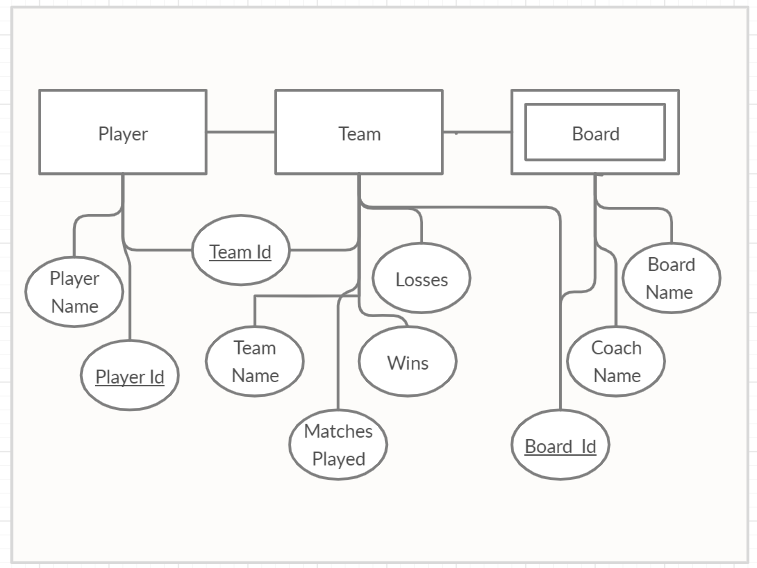

In [24]:
Image("UML.png", width = 500)

Strong Entity is represented by a single rectangle While the Weak Entity is represented by Double lined rectangle.

 ### 1. What are the ranges, data types and format of all the attributes in your entities?

The ranges, data types and format of all the attributes in our entities are mentioned below:

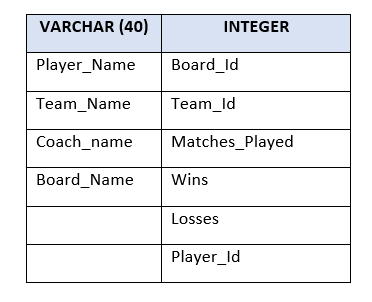


### 2.	When should you use an entity versus attribute?

Entity is a real-world object that represents data in database while an attribute is a property that describes an entity. To understand what information, we are storing inside an entity, we use attributes to specify the data types, ranges and format and its combinations

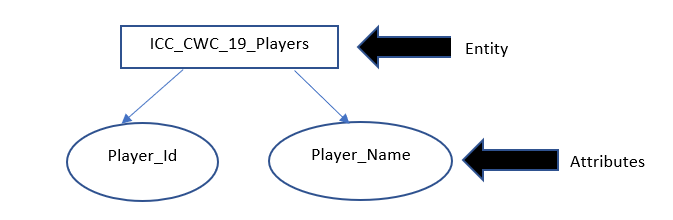


### 3.	When should you use an entity or relationship, and placement of attributes?


We use this when the tables in the databases are dependent on each other. Relationship between entities is a kind of a mathematical relationship taken from entity sets. 

From our ER diagram, we can see one such example:

(Board_Name, Coach_Name) ∈ Team (Table)


### 4.	How did you choose your keys? Which are unique?

We have chosen the below keys as the unique keys:

Team_Id: Primary Key (Because it is the only unique common key in all the tables and as per the relationship requirements and criteria based on which we are going to query the use cases)

Board_Id: Foreign Key (A primary key in one table becomes a foreign key in another table. It is used to link and create relationship with another table for reference and data) 


### 5.	Did you model hierarchies using the “ISA” design element? Why or why not?

No, we did not use “ISA” design element while modelling the ER diagram as the entities were not dependent. And also there was no scope that the hierarchy has an inheritance followed

### 6.	Were there design alternatives? What are their tradeoffs: entity vs. attribute, entity vs. relationship, binary vs. ternary relationship?

Yes, there can be design alternatives in our ER diagram.
We have used Binary VS. Ternary relationship i.e their arrangement is shown when two or three entities participate in the design.


### 7.	Where are you going to find the real-world data to populate your model?

We have used the below real-world website to gather the data

https://www.t20worldcup.com


### AUDIT VALIDITY/ACCURACY

The acquired data is said to be valid when it doesn’t contain any null values. Using Python, we checked for null values and duplicate values in the data.
All the rows were selected from all 3 sources and was found to have no null values. 


### AUDIT COMPLETNESS

The data collected were obtained from genuine websites and are real world data. The data is said to be complete when the obtained result matches the real time data. The final data which we have obtained correlates with ICC world raking, and hence proves to be complete

### AUDIT CONSISTENCY/UNIFORMITY

The data is consistent with no null values. The data collected from 3 different sources are linked through by a common attribute.

### CONCLUSION                                                                                                                                                                   
Primary focus of this assignment is to normalize dataset used in the previous assignment, cleaning of data, checking null values present in the data, data munging and to reformat the data to fit a conceptual database model. 

### CONTRIBUTION
Your contribution towards project. How much code did you write and how much you took from other site or some other source.

I contributed By Own: 50%

By External source: 40%

Provided by the professor : 10%


### Citations and References:

Each code in this assignment is self-developed and is not copied from any website. 

References were taken from the below website

https://www.cricketworldcup.com/

https://stackoverflow.com/

https://www.w3schools.com/sql

https://www.lucidchart.com

https://app.creately.com/

https://www.smartdraw.com

https://www.t20worldcup.com/




### LICENSE

This is a human-readable summary of (and not a substitute for) the license. Disclaimer. 

You are free to: 

Share — copy and redistribute the material in any medium or format 
Adapt — remix, transform, and build upon the material for any purpose, even commercially. 
The licensor cannot revoke these freedoms if you follow the license terms. 


#### Under the following terms:

Attribution — You must give appropriate credit, provide a link to the license, and indicate if changes were made. You may do so in any reasonable manner, but not in any way that suggests the licensor endorses you or your use. 

No additional restrictions — You may not apply legal terms or technological measures that legally restrict others from doing anything the license permits. 

#### Notices:

You do not have to comply with the license for elements of the material in the public domain or where your use is permitted by an applicable exception or limitation. 

No warranties are given. The license may not give you all the permissions necessary for your intended use. For example, other rights such as publicity, privacy, or moral rights may limit how you use the material.